## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
missing_values = X.isna().any().any() # Checking for missing values
X.dtypes # There is no categorical attributes, because all values are float64

missing_values

False

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split

np.random.seed(2002)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
best_k = -1
best_accuracy = 0

first_clf = KNeighborsClassifier(n_neighbors=1)
second_clf = KNeighborsClassifier(n_neighbors=3)
third_clf = KNeighborsClassifier(n_neighbors=5)
fourth_clf = KNeighborsClassifier(n_neighbors=10)
fifth_clf = KNeighborsClassifier(n_neighbors=15)
sixth_clf = KNeighborsClassifier(n_neighbors=25)

line_of_clf = [first_clf, second_clf, third_clf, fourth_clf, fifth_clf, sixth_clf]

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

for classifier in line_of_clf:
    y_predicted_test = classifier.fit(X_train_scaled[['alcohol', 'magnesium']], 
                                      y_train).predict(X_test_scaled[['alcohol', 'magnesium']])
    y_predicted_train = classifier.fit(X_train_scaled[['alcohol', 'magnesium']], 
                                       y_train).predict(X_train_scaled[['alcohol', 'magnesium']])
    accuracy_train = np.mean(y_predicted_train==y_train)
    accuracy_test = np.mean(y_predicted_test==y_test)
    
    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_k = classifier.get_params()['n_neighbors']
    
    print("Number of neighbors",classifier.get_params()['n_neighbors'], " -> ", 
          "\n", f" Test: {accuracy_test:3f} accuracy"
          "\n", f"Train: {accuracy_train:3f} accuracy", sep='')
    
print('\n', 'Best accuracy is reached with ', best_k, ' number of neighbors')

Number of neighbors1 -> 
 Test: 0.666667 accuracy
Train: 1.000000 accuracy
Number of neighbors3 -> 
 Test: 0.648148 accuracy
Train: 0.838710 accuracy
Number of neighbors5 -> 
 Test: 0.666667 accuracy
Train: 0.782258 accuracy
Number of neighbors10 -> 
 Test: 0.685185 accuracy
Train: 0.798387 accuracy
Number of neighbors15 -> 
 Test: 0.703704 accuracy
Train: 0.741935 accuracy
Number of neighbors25 -> 
 Test: 0.703704 accuracy
Train: 0.741935 accuracy

 Best accuracy is reached with  15  number of neighbors


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [6]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions
import itertools
print(*range(3))

0 1 2


**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

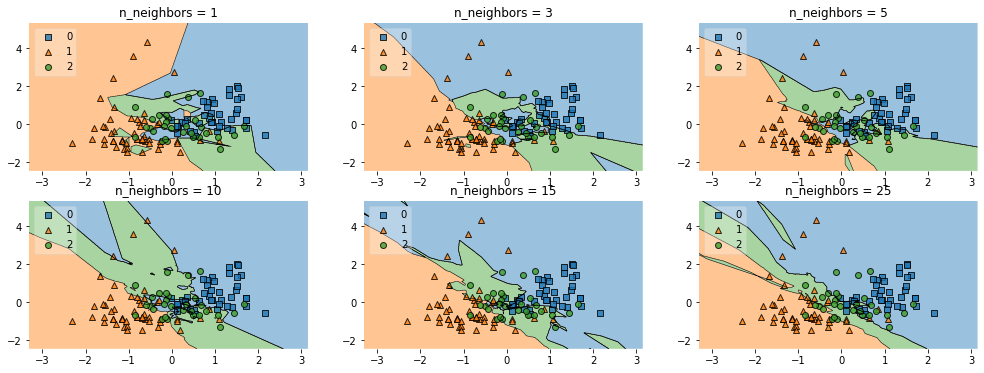

In [8]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(17, 6))
labels = []

for unit in line_of_clf:
    label = 'n_neighbors = '+ str(unit.get_params()['n_neighbors'])
    labels.append(label)

numpy_X = X_train_scaled[['alcohol', 'magnesium']].to_numpy()
    
for clf, lab, grd in zip(line_of_clf, 
                    labels, itertools.product(range(3), repeat=2)):
    
    clf.fit(X_test_scaled[['alcohol', 'magnesium']], y_test)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=numpy_X, y=y_train, clf=clf, legend=2)
    plt.title(lab)
    
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [9]:
# Исходя из результата по тестовой выборке в задании 1.3, можно понять, 
# что наиболее оптимальный выбор кол-ва соседей это 3. 
# Более того, ссылаясь на задание 1.5, мы также можем увидеть, что при кол-ве соседей равным 3 области классовне имеют
# особьых аномалий и картинка выглядит более приблеженной к реальности. (так например при кол-ве соседей равным 1
# мы имеем вкрапления класса 2 в области класса 1 из-за расположенных там всего 3 объектов или же
# при кол-ве равным 25 большинство объектов 2 класса находятся в области 0 класса)

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

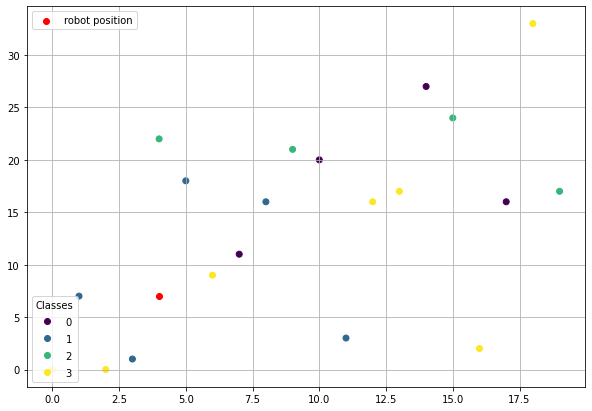

In [10]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [11]:
from sklearn.neighbors import KNeighborsClassifier
abc = [[10, 20]]
cba = [abc[0][0] + 1, abc[0][1]]
abc.append(cba)
abc

[[10, 20], [11, 20]]

In [12]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        # <ВАШ КОД ЗДЕСЬ>
#         self.trajectory = np.array(initial_position)
        self.trajectory = [initial_position]
        
        # kNN Classifier for determining the classes of landmarks
        # <ВАШ КОД ЗДЕСЬ> 
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes).predict([self.trajectory[len(self.trajectory) - 1]])
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        probability = np.random.binomial(n=1, p=0.8)
        if probability == 0:
            d_point = [self.trajectory[len(self.trajectory) - 1][0] + 1, 
                        self.trajectory[len(self.trajectory) - 1][1]]
            self.trajectory.append(d_point)
        else:
            if self.knn == 0:
                d_point = [self.trajectory[len(self.trajectory) - 1][0] + 1, 
                            self.trajectory[len(self.trajectory) - 1][1]] 
                self.trajectory.append(d_point)
            elif self.knn == 1:
                d_point = [self.trajectory[len(self.trajectory) - 1][0] - 1, 
                            self.trajectory[len(self.trajectory) - 1][1]] 
                self.trajectory.append(d_point)
            elif self.knn == 2:
                d_point = [self.trajectory[len(self.trajectory) - 1][0], 
                            self.trajectory[len(self.trajectory) - 1][1] + 1] 
                self.trajectory.append(d_point)
            elif self.knn == 3:
                d_point = [self.trajectory[len(self.trajectory ) - 1][0], 
                            self.trajectory[len(self.trajectory ) - 1][1] - 1] 
                self.trajectory.append(d_point)
                
        # <ВАШ КОД ЗДЕСЬ>


**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [13]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (16, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    # <ВАШ КОД ЗДЕСЬ>
#     traj = getattr(robot, 'trajectory').reshape((-1, 2))
    traj = np.array(getattr(robot, 'trajectory')).reshape((-1, 2))
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

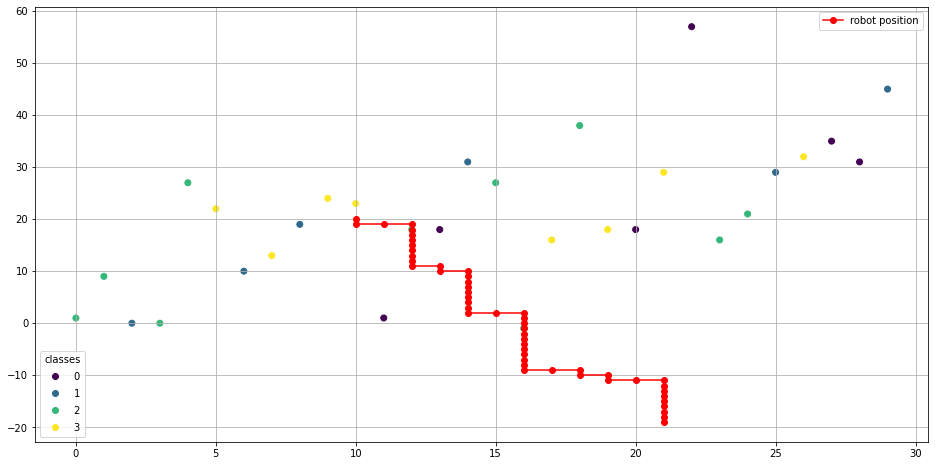

In [14]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

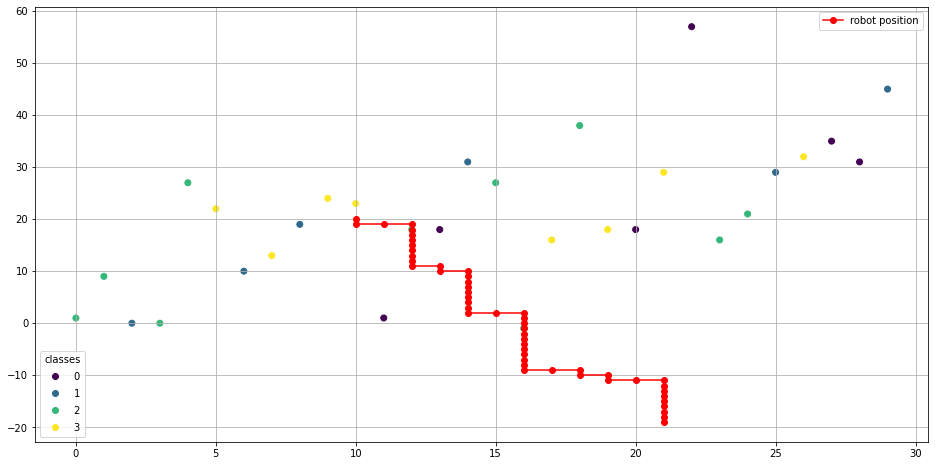

In [15]:
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)

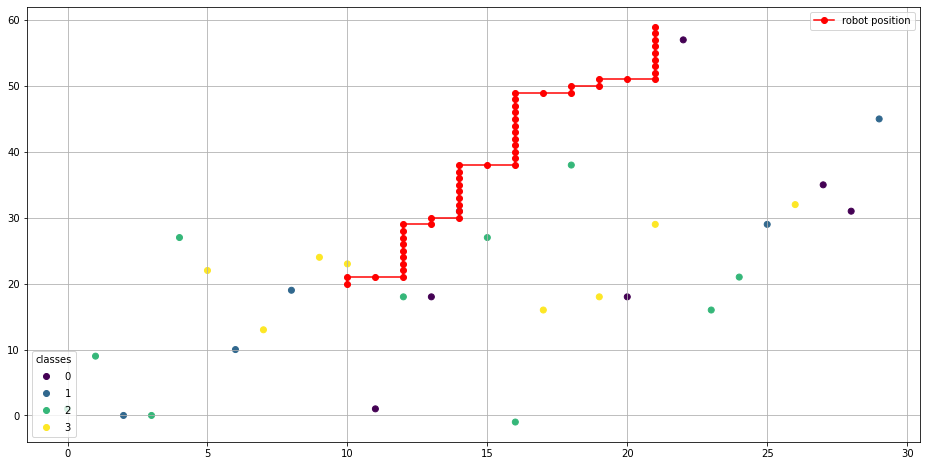

In [16]:
conduct_experiment(x, mean = 3, std = 10, k = 25, n_movements = 50)

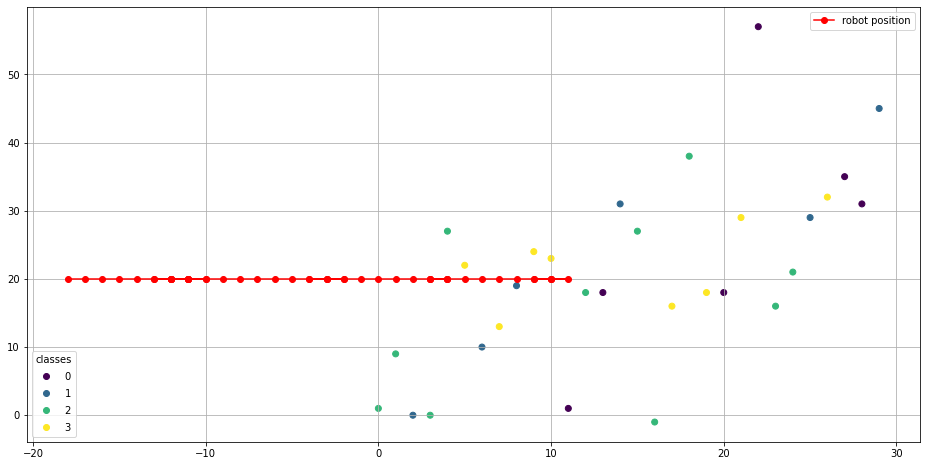

In [17]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)

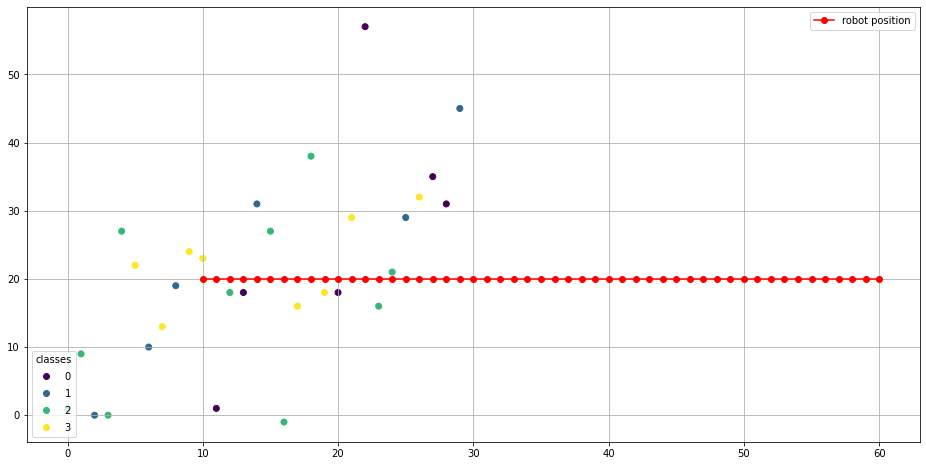

In [18]:
conduct_experiment(x, mean = 3, std = 10, k = 4, n_movements = 50)

In [19]:
# Влияние огромное, так как при малых соседях движение исключетельно прямолинейное.
# Если бы было осмсленно, можно было бы вручную задавать траекторию

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [20]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [21]:
data.isna().any().any()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [22]:
data.drop(columns='Unnamed: 0', inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [23]:
# Можно заметить, что размер бриллианта и его карат больше всего коррелируют с его ценой.
data[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']].corr()['price']

carat    0.921591
depth   -0.010647
table    0.127134
x        0.884435
y        0.865421
z        0.861249
price    1.000000
Name: price, dtype: float64

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [24]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
coded_attr = pd.DataFrame(ohe.fit_transform(data[['cut', 'color', 'clarity']]).toarray())
legit_columns = list(data['cut'].unique()) + list(data['color'].unique()) + list(data['clarity'].unique())
np.array(legit_columns)
coded_attr.columns = legit_columns
coded_data = pd.concat([data, coded_attr], axis=1)
coded_data.drop(columns=['cut', 'color', 'clarity'], inplace=True)
coded_data

,carat,depth,table,price,x,y,z,Ideal,Premium,Good,...,G,D,SI2,SI1,VS1,VS2,VVS2,VVS1,I1,IF
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [25]:
from sklearn.model_selection import train_test_split

X = coded_data[['carat', 'depth', 'table', 'x', 'y', 'z', 'Ideal', 'Premium',
       'Good', 'Very Good', 'Fair', 'E', 'I', 'J', 'H', 'F', 'G', 'D', 'SI2',
       'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']]
y = coded_data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [26]:
scaler_for_diamonds = StandardScaler()
X_train_std_scaled = scaler_for_diamonds.fit_transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_train_std_scaled = pd.DataFrame(X_train_std_scaled, columns=X[['carat', 'depth', 'table', 'x', 'y', 'z']].columns)
X_train_std_scaled.index = X_train.index
X_train[['carat', 'depth', 'table', 'x', 'y', 'z']] = X_train_std_scaled[['carat', 'depth', 'table', 'x', 'y', 'z']]

X_test_std_scaled = scaler_for_diamonds.fit_transform(X_test[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_test_std_scaled = pd.DataFrame(X_test_std_scaled, columns=X[['carat', 'depth', 'table', 'x', 'y', 'z']].columns)
X_test_std_scaled.index = X_test.index
X_test[['carat', 'depth', 'table', 'x', 'y', 'z']] = X_test_std_scaled[['carat', 'depth', 'table', 'x', 'y', 'z']]

C:\Users\nikita\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\nikita\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [27]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lr = linear_model.LinearRegression().fit(X_train, y_train)

y_predicted_train = lr.predict(X_train)
y_predicted_test = lr.predict(X_test)


print('MSE on train -> ', mean_squared_error(y_train, y_predicted_train), 
      '\n','MSE on test -> ', mean_squared_error(y_test, y_predicted_test), sep='')
lr.score(X_test, y_test)

MSE on train -> 1267634.6753225848
MSE on test -> 1300628.7184698845


0.9167125411993979

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [28]:
data_coef = pd.DataFrame(data=abs(lr.coef_), index=X.columns, columns=['initial value'])
data_coef.sort_values('initial value')

# Судя по таблице можно заметить, что среди вещетсвенных аттрибутов своими вессами выделяются в лучшую сторону такие как:
# carat, x.
# Также можно заметить, что наименее информативные это:
# z, y, table, depth

,initial value
Premium,2.406901
z,25.589399
y,44.521012
table,64.459748
depth,97.302623
Fair,142.286288
F,144.283393
VS1,165.015990
Very Good,178.051799
Good,252.688987


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [29]:
f_lasso = linear_model.Lasso(alpha=10)
f_ridge = linear_model.Ridge(alpha=10)

f_lasso.fit(X_train, y_train)
f_ridge.fit(X_train, y_train)
upd_data_coef = pd.DataFrame(data=abs(f_lasso.coef_), 
                             index=X.columns, columns=['value with Lasso']).sort_values('value with Lasso')
upd1_data_coef = pd.DataFrame(data=abs(f_ridge.coef_), 
                              index=X.columns, columns=['value with Ridge']).sort_values('value with Ridge')
upd_data_coef = pd.concat([upd_data_coef, upd1_data_coef, data_coef], axis=1)
upd_data_coef

# Веса уменьшились значительно! Проблема мультиколлинеарности заключалась в исключительно больших весах.

,value with Lasso,value with Ridge,initial value
y,0.000000,32.280735,44.521012
H,0.000000,338.419781,340.183314
Very Good,0.000000,178.019412,178.051799
Fair,0.000000,144.180891,142.286288
VVS1,22.170415,429.766885,438.206024
z,25.660466,29.495511,25.589399
Premium,27.848456,1.840455,2.406901
table,83.038544,64.768852,64.459748
Good,91.482537,253.985778,252.688987
depth,107.880105,95.784354,97.302623


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

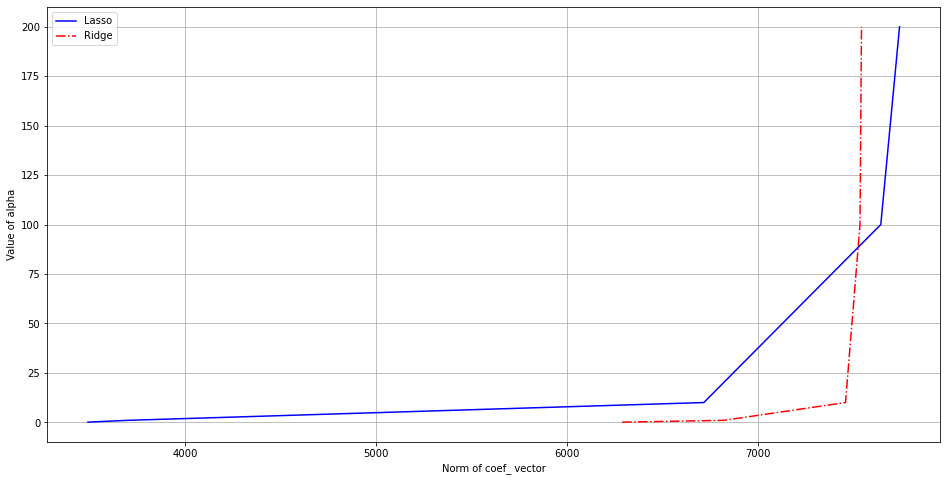

In [30]:
f_lasso_01 = linear_model.Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)
f_lasso_1 = linear_model.Lasso(alpha=1, max_iter=10000).fit(X_train, y_train)
f_lasso_10 = linear_model.Lasso(alpha=10, max_iter=10000).fit(X_train, y_train)
f_lasso_100 = linear_model.Lasso(alpha=100, max_iter=10000).fit(X_train, y_train)
f_lasso_200 = linear_model.Lasso(alpha=200, max_iter=10000).fit(X_train, y_train)

f_ridge_01 = linear_model.Ridge(alpha=0.1, max_iter=10000).fit(X_train, y_train)
f_ridge_1 = linear_model.Ridge(alpha=1, max_iter=10000).fit(X_train, y_train)
f_ridge_10 = linear_model.Ridge(alpha=10, max_iter=10000).fit(X_train, y_train)
f_ridge_100 = linear_model.Ridge(alpha=100, max_iter=10000).fit(X_train, y_train)
f_ridge_200 = linear_model.Ridge(alpha=200, max_iter=10000).fit(X_train, y_train)

line_of_lasso = [f_lasso_01, f_lasso_1, f_lasso_10, f_lasso_100, f_lasso_200]
line_of_ridge = [f_ridge_01, f_ridge_1, f_ridge_10, f_ridge_100, f_ridge_200]
length_lasso = []
length_ridge = []

for lasso in line_of_lasso:
    length_lasso.append(np.linalg.norm(lasso.coef_))

for ridge in line_of_ridge:
    length_ridge.append(np.linalg.norm(ridge.coef_))


plt.figure(figsize=(16,8))
g_lasso = plt.plot(length_lasso[::-1], [0.1, 1, 10, 100, 200], color='b')
g_ridge = plt.plot(length_ridge[::-1], [0.1, 1, 10, 100, 200], color='r', linestyle='-.')
plt.legend(['Lasso', 'Ridge'])
plt.xlabel('Norm of coef_ vector')
plt.ylabel('Value of alpha')
plt.grid()
plt.show()

# 1) Ridge агрессивнее уменьшает веса, это можно увидеть из графика, так как резкий скачок
# 2) По моему скромному мнению, Lasso используют чаще так как он более лоялен к значению параметра регуляризации 
# и растет более плавно.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [31]:
lr_lassoCV = linear_model.LassoCV(cv=5, alphas=np.arange(0.05, 15, 0.05), max_iter=10000)
lr_lassoCV.fit(X_train, y_train)

dataf_lasso = pd.DataFrame(lr_lassoCV.mse_path_, index=lr_lassoCV.alphas_)
dataf_lasso['mean error'] = dataf_lasso.mean(axis=1)
min_error = dataf_lasso.index[dataf_lasso['mean error'] == dataf_lasso['mean error'].min()]

print('Best choice of alpha -> ', min_error[0], ', with error -> ', dataf_lasso['mean error'].min(), sep='')

Best choice of alpha -> 0.5, with error -> 1271061.7223402758


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [32]:
ff_lasso = linear_model.Lasso(alpha=1.45).fit(X_train, y_train)
coef_data = pd.DataFrame(abs(ff_lasso.coef_), index=X.columns, columns=['value'])
coef_data.sort_values('value')

# Судя по коэффициентам наиболее значемые атрибуты - это carat (его значение), Ideal (treatment), color (D, G, E), 
# clarity (SI2, SI1, VS1, VS2, I1, IF), x (размер в длину). Однако есть и неинформативные - treatment(Fair), color(H), y.
# Остальные аттрибуты имеют среднюю стпень значимости, то есть влияют на предсказания, но не так сильно как те,
# которые указаны выше.

,value
y,0.000000
Fair,0.000000
H,0.000000
z,24.091065
Very Good,24.136494
table,67.117636
VVS1,87.372291
depth,99.355476
Good,104.841295
Premium,130.446604


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [33]:
y_predicted_test_lasso = ff_lasso.predict(X_test)
print(f'MSE (LASSO) -> {mean_squared_error(y_test, y_predicted_test_lasso)}',
     f'MSE (LINEAR) -> {mean_squared_error(y_test, y_predicted_test)}', sep='\n')

# MSE на LASSO имеет меньшую ошибку, поэтому лучше испльзовать её.
# Возможным объяснением может быть то, что модель использовав соптимизрованные веса лучше справлялась с отклонениями в 
# принзаках, следовательно более точно предсказывала целевую переменную.

MSE (LASSO) -> 1299492.319794671
MSE (LINEAR) -> 1300628.7184698845
